In [22]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time

from sklearn import svm
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [2]:
def mixture_data(n):
    probs = [0.6,0.4]
    
    means = [100,400]
    sdevs = [40,80]
    
    
    k = np.random.choice(a = [0,1],p = probs, size = n)
    return np.array([sp.stats.norm.rvs(means[k[i]],sdevs[k[i]],1) for i in range(n)]).ravel()
    
    
def mixture_2d(n):
    probs = [0.6,0.4]
    
    means = [100,400]
    sdevs = [40,80]
    
    
    k = np.random.choice(a = [0,1],p = probs, size = n)
    col1 = np.array([sp.stats.norm.rvs(means[k[i]],sdevs[k[i]],1) for i in range(n)]).ravel()
    col2 = np.array([sp.stats.norm.rvs(means[k[i]],sdevs[k[i]],1) for i in range(n)]).ravel()
    col3 = k
    return np.column_stack((col1,col2,k))


    #return sp.stats.norm.rvs(100,20,n)+0.3*sp.stats.norm.rvs(2000,10,n)

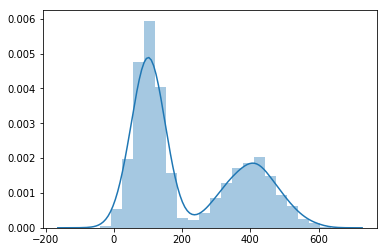

In [3]:
sns.distplot(mixture_data(5000))
plt.show()

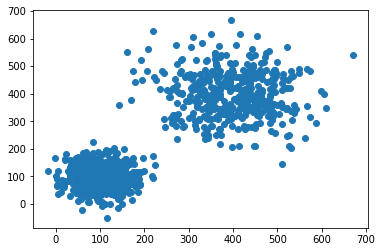

In [4]:
gen_data = mixture_2d(1000)
data_df = pd.DataFrame(gen_data)
plt.scatter(gen_data[:,0],gen_data[:,1])
plt.show()

In [49]:
training_times = []
clf_times = []
f1_scores = []
data_sizes = range(20,2000,20)

test_data = mixture_2d(1000)

for n in data_sizes:
    gen_data = mixture_2d(n)
    
    start = time.time()
    clf = svm.SVC()
    clf.fit(gen_data[:,[0,1]],gen_data[:,2])
    training_times.append(time.time()-start)
    
    start = time.time()
    clf.predict(X=test_data[:,[0,1]])
    clf_times.append(time.time()-start)
    f1_scores.append(f1_score(clf.predict(test_data[:,[0,1]]),test_data[:,2].astype(int)))

/Users/nico/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


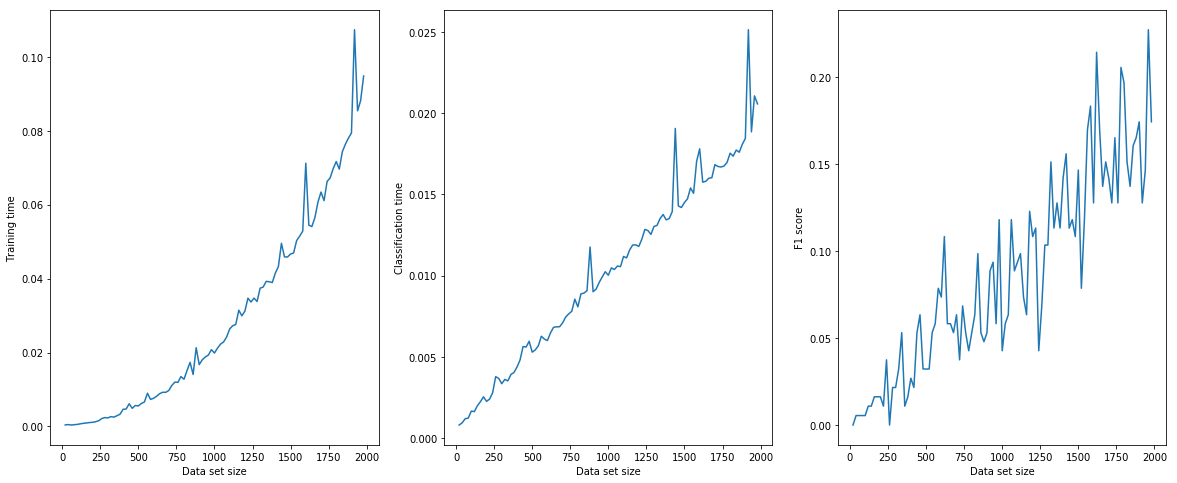

In [50]:
fig, axes = plt.subplots(1,3,figsize=(20,8))

axes[0].plot(data_sizes,training_times)
axes[0].set_ylabel('Training time')
axes[1].plot(data_sizes,clf_times)
axes[1].set_ylabel('Classification time')
axes[2].plot(data_sizes,f1_scores)
axes[2].set_ylabel('F1 score')
axes[0].set_xlabel('Data set size')
axes[1].set_xlabel('Data set size')
axes[2].set_xlabel('Data set size')
plt.show()